Input: 1
Hidden: 20
Output: 4


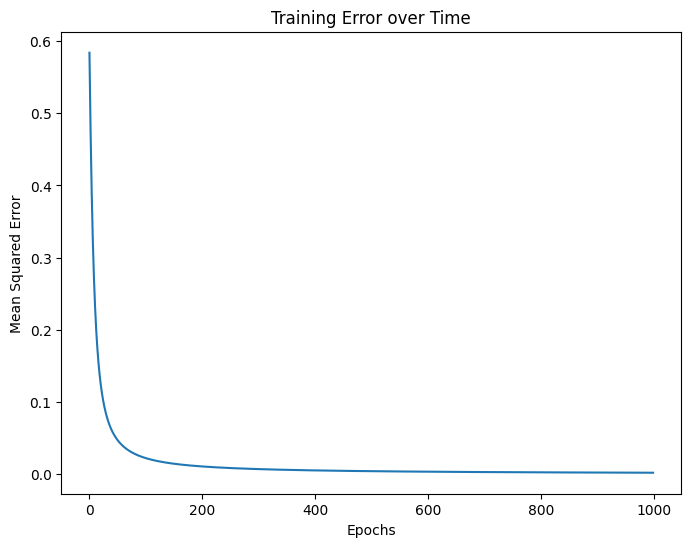

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input data
X = np.array([[0], [1]])

# Define the outputs for the four functions
F1 = np.array([[0], [0]])  # Constant
F2 = np.array([[1], [1]])  # Constant
F3 = np.array([[0], [1]])  # Non-constant
F4 = np.array([[1], [0]])  # Non-constant

# Combine the functions into a single array
D = np.hstack((F1, F2, F3, F4))

# Labels: 0 for constant functions, 1 for non-constant functions
labels = np.array([[0, 0, 1, 1]])

# Neural network parameters
input_neurons = X.shape[1]
hidden_neurons = 20
output_neurons = labels.shape[1]

print(f"Input: {input_neurons}\nHidden: {hidden_neurons}\nOutput: {output_neurons}")

# Initialize weights
np.random.seed(42)
W1 = np.random.randn(hidden_neurons, input_neurons)
W2 = np.random.randn(output_neurons, hidden_neurons)

alpha = 0.1
mse = []
epochs = 1000

# Training the neural network
for epoch in range(epochs):
    total_error = 0
    for i in range(X.shape[0]):
        x = X[i, :].reshape(-1, 1)
        d = labels[:, i].reshape(-1, 1)
        
        # Forward pass
        weighted_sum_input2hidden = np.dot(W1, x)
        sigmoid_input2hidden = 1 / (1 + np.exp(-weighted_sum_input2hidden))
        weighted_sum_hidden2output = np.dot(W2, sigmoid_input2hidden)
        sigmoid_hidden2output = 1 / (1 + np.exp(-weighted_sum_hidden2output))
        
        # Error and backpropagation
        error_output = d - sigmoid_hidden2output
        delta_output = sigmoid_hidden2output * (1 - sigmoid_hidden2output) * error_output
        error_hidden = np.dot(W2.T, delta_output)
        delta_hidden = sigmoid_input2hidden * (1 - sigmoid_input2hidden) * error_hidden
        
        dW1 = alpha * np.dot(delta_hidden, x.T)
        W1 += dW1
        dW2 = alpha * np.dot(delta_output, sigmoid_input2hidden.T)
        W2 += dW2
        
        total_error += np.sum(error_output**2)
    mse.append(total_error / X.shape[0])

mse = np.array(mse).flatten()

# Plot the Mean Squared Error over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), mse)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Error over Time")
plt.show()




In [10]:
# Apply threshold to classify outputs
threshold = 0.5

for i in range(X.shape[0]):
    x = X[i, :].reshape(-1, 1)
    weighted_sum_input2hidden = np.dot(W1, x)
    sigmoid_input2hidden = 1 / (1 + np.exp(-weighted_sum_input2hidden))
    weighted_sum_hidden2output = np.dot(W2, sigmoid_input2hidden)
    sigmoid_hidden2output = 1 / (1 + np.exp(-weighted_sum_hidden2output))
    
    predicted_class = (sigmoid_hidden2output.flatten() >= threshold).astype(int)
    
    print(f"Input: {X[i, 0]} -> Predicted Probabilities: {sigmoid_hidden2output.flatten()}")
    print(f"Input: {X[i, 0]} -> Classified As: {predicted_class}")


Input: 0 -> Predicted Probabilities: [0.02593731 0.03145687 0.02671115 0.01756204]
Input: 0 -> Classified As: [0 0 0 0]
Input: 1 -> Predicted Probabilities: [0.01505184 0.01171235 0.01966795 0.02713448]
Input: 1 -> Classified As: [0 0 0 0]
